# Introduction

The company make new campaign strategies to interest the consuments. As data analyticys, we must analysis that the new campaign more efectif to reach more consument than the campaign before.\
We use A/B testing to choose the best one for feature campaign strategy.

# Dataset
The dataset we are using here contains two data files about two marketing campaigns (Control Campaign and Test Campaign). \
The Variables of dataset is :
- **Campaign Name**: Target campaign type.
- **Date**: Time the published the campaign
- **Spend [USD]**: The amount of money spent on advertising in the campaign.
- **Impressions**: The number of people who viewed the ad in the campaign (contains repeated viewing of the same person for the ad).
- **Reach**: The number of unique people who saw the ad in the campaign.
- **Website Clicks**: The number of users who clicked on the website link in the campaign's advertisement.
- **Searches**: The number of users who performed a search on the website.
- **View Content**: Number of users who have viewed product details.
- **Add to Cart**: The number of users who have added the product to the cart.
- **Purchase**: The number of users who have purchased the product.

---
Let's Start

In [1]:
# Import Libraries
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import csv dataset
df_control = pd.read_csv('control_group.csv', sep=';')
df_test = pd.read_csv('test_group.csv', sep=';')

In [3]:
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df_control.shape

(30, 10)

In [4]:
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [109]:
df_test.shape

(30, 10)

In [5]:
# Change the columns name
columns_name = ['Campaign Name', 'Date', 'Spend [USD]', 'Impressions', 'Reach', 'Website Clicks', 'Searches', 'View Content', 'Add to Cart', 'Purchase']

df_control.columns = columns_name
df_test.columns = columns_name

# Data Preparation
- Check Duplicated and missing values data
- merger two dataset
- Transfom Date

In [6]:
# Check duplicated data
print(df_control.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [7]:
# Ceck missing values data
print(df_control.isnull().sum())
print('-----')
print(df_test.isnull().sum())

Campaign Name     0
Date              0
Spend [USD]       0
Impressions       1
Reach             1
Website Clicks    1
Searches          1
View Content      1
Add to Cart       1
Purchase          1
dtype: int64
-----
Campaign Name     0
Date              0
Spend [USD]       0
Impressions       0
Reach             0
Website Clicks    0
Searches          0
View Content      0
Add to Cart       0
Purchase          0
dtype: int64


In [8]:
df_control.describe()

,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


Mean and median, not too different. So, we fill missing value with mean.

In [9]:
df_control['Impressions'].fillna(value = df_control['Impressions'].mean(), inplace = True)
df_control['Reach'].fillna(value = df_control['Reach'].mean(), inplace = True)
df_control['Website Clicks'].fillna(value = df_control['Website Clicks'].mean(), inplace = True)
df_control['Searches'].fillna(value = df_control['Searches'].mean(), inplace = True)
df_control['View Content'].fillna(value = df_control['View Content'].mean(), inplace = True)
df_control['Add to Cart'].fillna(value = df_control['Add to Cart'].mean(), inplace = True)
df_control['Purchase'].fillna(value = df_control['Purchase'].mean(), inplace = True)

In [111]:
# Merger Data
df = df_control.merge(df_test, how='outer').sort_values(['Date'])
df = df.reset_index(drop= True)

In [11]:
# Transform Date
df.Date = pd.to_datetime(df.Date)

In [12]:
df.head()

,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,2019-10-08,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,2019-11-08,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [112]:
df.shape

(60, 10)

# Data Eksploration

### Comparrasion Between Control and Test Campaign in any Variables

In [13]:
Label = ['Control Campaign', 'Test Campaign']
Values1 = [df[df['Campaign Name']=='Control Campaign']['Spend [USD]'].sum(), df[df['Campaign Name']=='Test Campaign']['Spend [USD]'].sum()]
Values2 = [df[df['Campaign Name']=='Control Campaign']['Impressions'].sum(), df[df['Campaign Name']=='Test Campaign']['Impressions'].sum()]
Values3 = [df[df['Campaign Name']=='Control Campaign']['Reach'].sum(), df[df['Campaign Name']=='Test Campaign']['Reach'].sum()]
Values4 = [df[df['Campaign Name']=='Control Campaign']['Website Clicks'].sum(), df[df['Campaign Name']=='Test Campaign']['Website Clicks'].sum()]
Values5 = [df[df['Campaign Name']=='Control Campaign']['Searches'].sum(), df[df['Campaign Name']=='Test Campaign']['Searches'].sum()]
Values6 = [df[df['Campaign Name']=='Control Campaign']['View Content'].sum(), df[df['Campaign Name']=='Test Campaign']['View Content'].sum()]
Values7 = [df[df['Campaign Name']=='Control Campaign']['Add to Cart'].sum(), df[df['Campaign Name']=='Test Campaign']['Add to Cart'].sum()]
Values8 = [df[df['Campaign Name']=='Control Campaign']['Purchase'].sum(), df[df['Campaign Name']=='Test Campaign']['Purchase'].sum()]


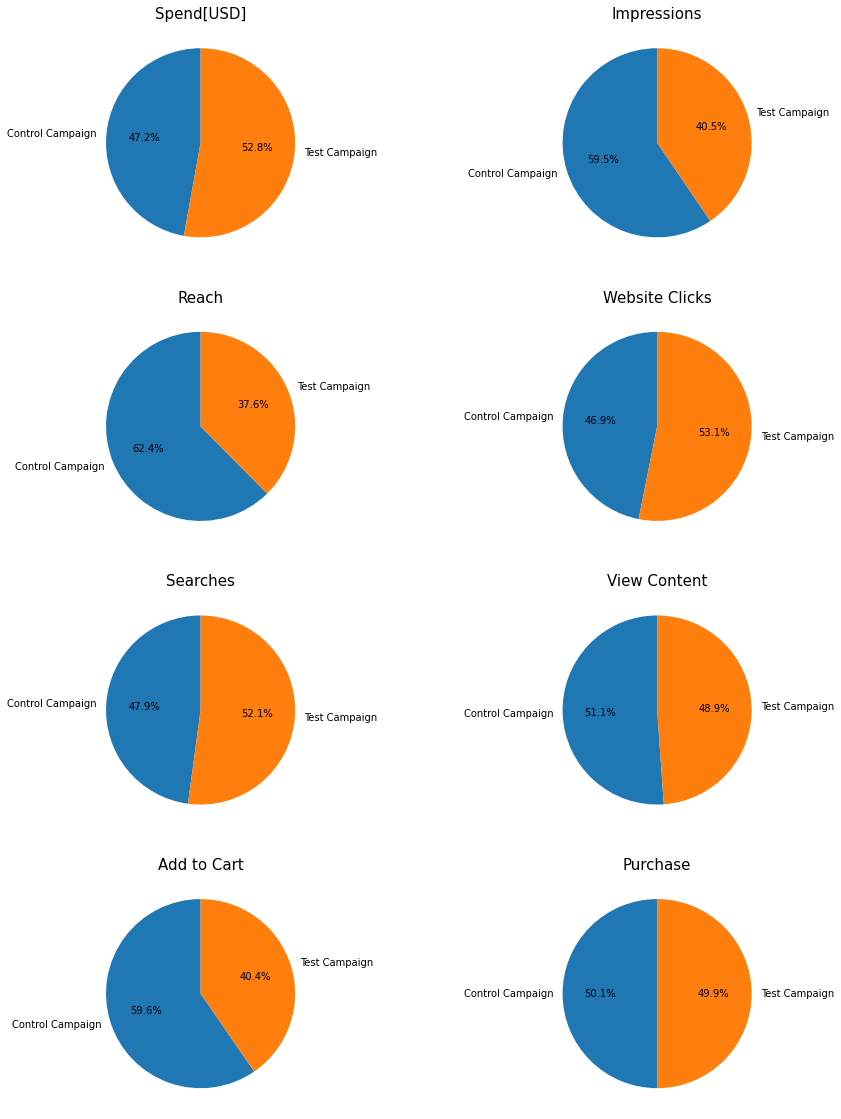

In [14]:
fig, axs = plt.subplots(4,2, figsize = (15, 20), facecolor = 'white')
axs[0,0].pie( Values1,labels = Label, autopct = '%1.1f%%', startangle =90)
axs[0,0].set_title('Spend[USD]', size=15)

axs[0,1].pie( Values2,labels = Label, autopct = '%1.1f%%', startangle =90)
axs[0,1].set_title('Impressions', size=15)

axs[1,0].pie( Values3,labels = Label, autopct = '%1.1f%%', startangle =90)
axs[1,0].set_title('Reach', size=15)

axs[1,1].pie( Values4,labels = Label, autopct = '%1.1f%%', startangle =90)
axs[1,1].set_title('Website Clicks', size=15)

axs[2,0].pie( Values5,labels = Label, autopct = '%1.1f%%', startangle =90)
axs[2,0].set_title('Searches', size=15)

axs[2,1].pie( Values6,labels = Label, autopct = '%1.1f%%', startangle =90)
axs[2,1].set_title('View Content', size=15)

axs[3,0].pie( Values7,labels = Label, autopct = '%1.1f%%', startangle =90)
axs[3,0].set_title('Add to Cart', size=15)

axs[3,1].pie( Values8,labels = Label, autopct = '%1.1f%%', startangle =90)
axs[3,1].set_title('Purchase', size=15)

fig.show()

From the Pie Chart we know, that Test campaign have values more than Control Campaign in variabel : Spend [USD], Website Clicks, and Searches

# Correlation any Variables

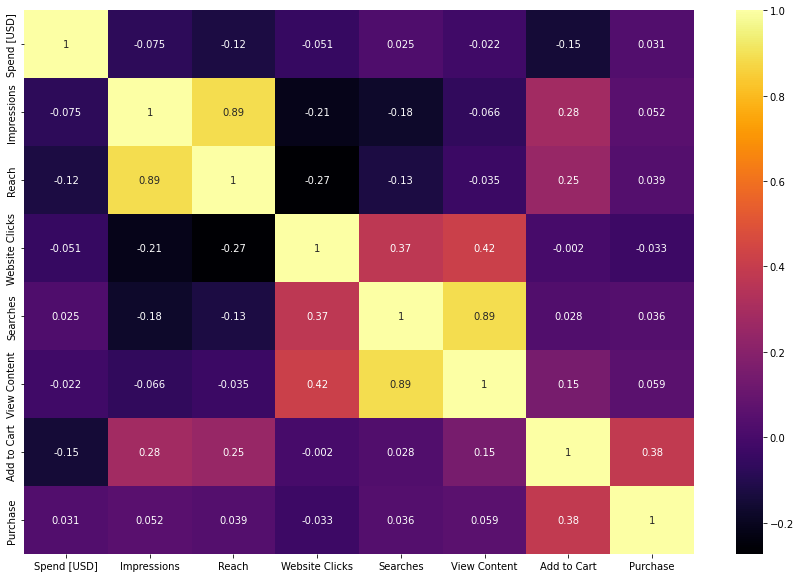

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='inferno')
plt.show()

From heatmap, we know that varible with big correlation is : (Reach vs Impression), (Searches vs Website Clicks), (View Content vs Website Clicks), (View Content vs Searches), (Add to Cart vs Purchase)

In [66]:
#Reach vs Impressions

fig = px.scatter(data_frame=df, x='Impressions', y='Reach', color='Campaign Name', title='Reach vs Impressions', width=600, 
    height=500, trendline='ols', size= 'Spend [USD]')
fig.show()

In [113]:
# Searches vs Website Clicks

fig = px.scatter(data_frame=df, x='Searches', y='Website Clicks', color='Campaign Name', title='Searches vs Website Clicks', 
    width=600, height=500, trendline='ols', size= 'Spend [USD]')
fig.show()

In [114]:
# View Content vs Website Clicks

fig = px.scatter(data_frame=df, x='View Content', y='Website Clicks', color='Campaign Name', title='View Content vs Website Clicks', 
    width=600, height=500, trendline='ols', size= 'Spend [USD]')
fig.show()

In [69]:
# View Content vs Searches

fig = px.scatter(data_frame=df, x='View Content', y='Searches', color='Campaign Name', title='View Content vs Searches', 
    width=600, height=500, trendline='ols', size= 'Spend [USD]')
fig.show()

In [70]:
# Purchase vs Add to Cart

fig = px.scatter(data_frame=df, x='Add to Cart', y='Purchase', color='Campaign Name', title='Purchase vs Add to Cart', 
    width=600, height=500, trendline='ols', size= 'Spend [USD]')
fig.show()

Test campaigns have a tendency to increase purchases compared to control campaigns. This can be seen in the test campaign graph which is climbing, while the control campaign tends to be flat, even though the add to cart value for the control campaign is higher.

# Adding Variabel CTR, CTP, and CR

- **Click-Through Rate (CTR)** : Percentage of people who view the pages (impression) and than click on it \
CRT = Total Click/(Total Click + Total View) * 100%
- **Click-Through Probability (CTP)** : Not like CTR, multiple clicks  in CTP is counted as a sigle click \
CTP = People with at least 1 click/ number of unique visitor * 100%
- **Conversion Rate (CR)** : Proportion ending with transaction \
CR = Converted / (Converted + Not Converted) * 100%

In [28]:
df['CTR'] = df['Website Clicks'] / (df['Website Clicks'] + df['Impressions']) * 100
df['CTP'] = df['Website Clicks'] / df['Reach'] * 100
df['CR'] = df['Purchase'] / df['Add to Cart'] * 100

In [32]:
df.tail()

,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase,CTR,CTP,CR
55,Control Campaign,2019-07-08,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0,1.823670,2.064888,42.795883
56,Test Campaign,2019-08-08,2916,33669.0,20149.0,7184.0,2867.0,2194.0,1240.0,431.0,17.585000,35.654375,34.758065
57,Control Campaign,2019-08-08,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0,7.393151,11.132067,49.677419
58,Control Campaign,2019-09-08,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0,4.860033,6.531361,77.674419
59,Test Campaign,2019-09-08,2652,45511.0,31598.0,8259.0,2899.0,2761.0,1200.0,845.0,15.359866,26.137730,70.416667


In [39]:
labels = ['Control Campaign', 'Test Campaign']

CTR_values = [df[df['Campaign Name']=='Control Campaign']['CTR'].sum(), df[df['Campaign Name']=='Test Campaign']['CTR'].sum()]
CTP_values = [df[df['Campaign Name']=='Control Campaign']['CTP'].sum(), df[df['Campaign Name']=='Test Campaign']['CTP'].sum()]
CR_values = [df[df['Campaign Name']=='Control Campaign']['CR'].sum(), df[df['Campaign Name']=='Test Campaign']['CR'].sum()]

In [59]:
# CTR Visualization
fig = px.pie( data_frame=df, names=labels, values= CTR_values, height=400, width=600, title='Clicks-Through Rate(CTR)')
fig.show()

In [60]:
# CTP Visualization

fig = px.pie( data_frame=df, names=labels, values= CTP_values, height=400, width=600, title='Clicks-Through Probability(CTP)')
fig.show()

In [62]:
fig = px.pie( data_frame=df, names=labels, values= CR_values, height=400, width=600, title='Convertion rate (CR)')
fig.show()

As we know, Test campaign has values CTR, CTP, and CR more than Control Campaign

# A/B Testing

### Normalitas Testing
- H0 : p-value > 0.05 (Normal distribution)
- H1 : p-value < 0.05 (Not Normal distribution)

If data have normal ditribution and same Variancy, we can use T-Tes, but if not we use Mann-Whitney U test

### Significancy Testing 
- H0 : p-value > 0.05 (Not significant)
- H1 : p-value < 0.05 (Significant)

### CTR

In [79]:
df_CTR_cont = df[df['Campaign Name']== 'Control Campaign']['CTR']
df_CTR_test = df[df['Campaign Name']== 'Test Campaign']['CTR']


In [120]:
# Normalitas Test
from scipy.stats import  shapiro

u1 = shapiro(df_CTR_cont)
u2 = shapiro(df_CTR_test)

if u1[1] > 0.05 :
    print (f'df_CTR_cont Normal distribution with p-value : {u1[1]} > 0.05')
else :
    print (f'df_CTR_cont NOT Normal distribution with p-value: {u1[1]} < 0.05')

if u2[1] > 0.05 :
    print (f'df_CTR_test Normal distribution with p-value : {u2[1]} > 0.05')
else :
    print (f'df_CTR_test NOT Normal distribution with p-value : {u2[1]} < 0.05')


df_CTR_cont Normal distribution with p-value : 0.3189360797405243 > 0.05
df_CTR_test NOT Normal distribution with p-value : 0.0035201222635805607 < 0.05


In [119]:
# Calculate the significance of applicance for each group using Mann-Whitney U test
from scipy.stats import  mannwhitneyu

u3 = mannwhitneyu(df_CTR_cont, df_CTR_test)

if u3[1] < 0.05:
    print (f'CTR test campaign is significantly different with CTR control campaign, p-value :  {u3[1]}')
else :
    print (f'CTR test campaign is NOT significantly different with CTR control campaign, p-value : {u3[1]}')

CTR test campaign is significantly different with CTR control campaign, p-value :  0.00021264638274527632


## CTP

In [97]:
df_CTP_cont = df[df['Campaign Name']== 'Control Campaign']['CTP']
df_CTP_test = df[df['Campaign Name']== 'Test Campaign']['CTP']

In [118]:
# Normalitas Test

u4 = shapiro(df_CTP_cont)
u5 = shapiro(df_CTP_test)

if u4[1] > 0.05 :
    print (f'df_CTP_cont Normal distribution with p-value : {u4[1]} > 0.05')
else :
    print (f'df_CTP_cont NOT Normal distribution with p-value: {u4[1]} < 0.05')

if u5[1] > 0.05 :
    print (f'df_CTP_test Normal distribution with p-value : {u5[1]} > 0.05')
else :
    print (f'df_CTP_test NOT Normal distribution with p-value : {u5[1]} < 0.05')


df_CTP_cont Normal distribution with p-value : 0.11112130433320999 > 0.05
df_CTP_test NOT Normal distribution with p-value : 5.458336431729549e-07 < 0.05


In [117]:
# Calculate the significance of applicance for each group using Mann-Whitney U test

u6 = mannwhitneyu(df_CTP_cont, df_CTP_test)

if u6[1] < 0.05:
    print (f'CTP test campaign is significantly different with CTP control campaign, p-value :  {u6[1]}')
else :
    print (f'CTP test campaign is NOT significantly different with CTP control campaign, p-value : {u6[1]}')

CTP test campaign is significantly different with CTP control campaign, p-value :  4.942599819037003e-05


## CR

In [103]:
df_CR_cont = df[df['Campaign Name']== 'Control Campaign']['CR']
df_CR_test = df[df['Campaign Name']== 'Test Campaign']['CR']

In [116]:
# Normalitas Test

u7 = shapiro(df_CR_cont)
u8 = shapiro(df_CR_test)

if u7[1] > 0.05 :
    print (f'df_CR_cont Normal distribution with p-value : {u7[1]} > 0.05')
else :
    print (f'df_CR_cont NOT Normal distribution with p-value: {u7[1]} < 0.05')

if u8[1] > 0.05 :
    print (f'df_CR_test Normal distribution with p-value : {u8[1]} > 0.05')
else :
    print (f'df_CR_test NOT Normal distribution with p-value : {u8[1]} < 0.05')


df_CR_cont NOT Normal distribution with p-value: 5.612933455267921e-05 < 0.05
df_CR_test Normal distribution with p-value : 0.7489132881164551 > 0.05


In [115]:
# Calculate the significance of applicance for each group using Mann-Whitney U test

u9 = mannwhitneyu(df_CR_cont, df_CR_test)

if u9[1] < 0.05:
    print (f'The CR test campaign is significantly different from the CR control campaign : p-value :  {u9[1]}')
else :
    print (f'The CR test campaign is NOT significantly different from the CR control campaign :p-value : {u9[1]}')

The CR test campaign is significantly different from the CR control campaign : p-value :  0.00011057725968083765


The test campaign is significantly different from the control campaign in the variables CTR, CTP, and CR.

# Conclusion


1. Control campaign is better than test campaign in variables impressions, reach, view content, add to cart, and purchase.
2. The test campaign is better than the control campaign in website clicks and searches but has a higher spend [USD] variable than the control campaign.
3. The test campaign is significantly better than the control campaign in CTR, CTP, and CR.

# Suggestion

Although the test campaign has a higher CTR, CTP, and CR than the control campaign, we need to analyze and discuss with the marketing department if we should use the test campaign to improve impressions, reach, view content, add to cart, and purchase. So a test campaign is more effective and better than a control campaign.